In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kapillondhe/american-sign-language")

print("Path to dataset files:", path)

100%|██████████| 4.64G/4.64G [02:42<00:00, 30.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kapillondhe/american-sign-language/versions/1


In [ ]:
!pip install mediapipe opencv-python tensorflow kagglehub


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 22.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.6 which is incompatible.


In [ ]:
!pip install mediapipe opencv-python numpy tensorflow

In [ ]:
!pip install mediapipe==0.10.21 tensorflow==2.12.0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninsta

In [ ]:
import cv2
import numpy as np
import os
import mediapipe as mp
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv2D, MaxPooling2D, Flatten, TimeDistributed
from sklearn.model_selection import train_test_split


In [ ]:
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kapillondhe/american-sign-language")

# List subfolders or image files
print(os.listdir(path))

['ASL_Dataset']


In [ ]:
asl_dataset_path = os.path.join(path, "ASL_Dataset")
print(os.listdir(asl_dataset_path))


['Test', 'Train']


In [ ]:
import os

# Go into the 'Train' set
train_path = os.path.join(asl_dataset_path, "Train")
print("Train folders:", os.listdir(train_path))  # Should show A, B, C...

# Pick letter 'A' and show one image
a_path = os.path.join(train_path, "A")
print("Sample images in A:", os.listdir(a_path))  # Will show ['1.jpg', '2.jpg', ...]

# Build the full path to one image
sample_img_path = os.path.join(a_path, os.listdir(a_path)[0])
print("Sample image path:", sample_img_path)


Train folders: ['Nothing', 'Space', 'Q', 'A', 'C', 'H', 'Z', 'X', 'Y', 'O', 'G', 'K', 'P', 'U', 'S', 'V', 'M', 'E', 'L', 'W', 'J', 'N', 'F', 'T', 'R', 'I', 'B', 'D']
Sample images in A: ['A2262.jpg', '1285.jpg', 'A1927.jpg', '520.jpg', '2131.jpg', '2248.jpg', 'A1656.jpg', '542.jpg', 'A2998.jpg', 'A741.jpg', 'A2224.jpg', '2367.jpg', '1011.jpg', '2918.jpg', 'A390.jpg', '1025.jpg', '1617.jpg', '127.jpg', '1585.jpg', '1590.jpg', 'A2105.jpg', '2642.jpg', 'A2962.jpg', '2334.jpg', '775.jpg', 'A485.jpg', '259.jpg', '417.jpg', 'A2993.jpg', '2557.jpg', '2543.jpg', '187.jpg', 'A1585.jpg', 'A772.jpg', 'A337.jpg', '2439.jpg', 'A509.jpg', '1543.jpg', 'A804.jpg', 'A1233.jpg', 'A2324.jpg', 'A110.jpg', 'A2845.jpg', 'A1083.jpg', '390.jpg', '926.jpg', '2259.jpg', '875.jpg', '570.jpg', 'A602.jpg', '710.jpg', 'A2178.jpg', 'A632.jpg', 'A2059.jpg', 'A1323.jpg', 'A2271.jpg', 'A2128.jpg', 'A817.jpg', '1012.jpg', '158.jpg', 'A1072.jpg', 'A2438.jpg', 'A2823.jpg', '352.jpg', 'A2965.jpg', '2972.jpg', 'A2223.jpg', 

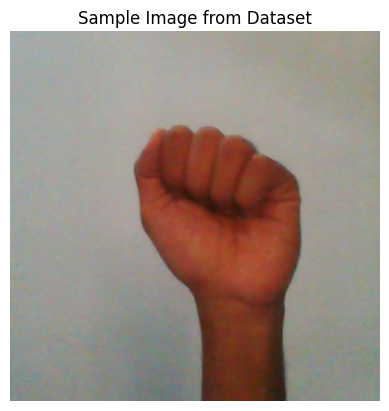

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(sample_img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Sample Image from Dataset")
plt.axis("off")
plt.show()


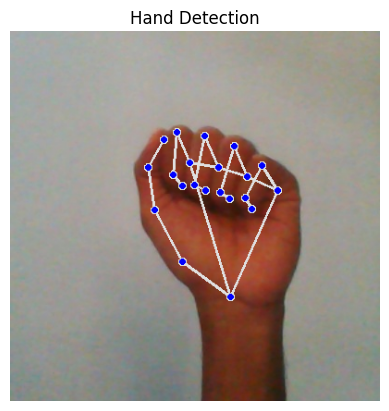

In [ ]:
import mediapipe as mp

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

with mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5) as hands:
    results = hands.process(img_rgb)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(img_rgb, hand_landmarks, mp_hands.HAND_CONNECTIONS)
    else:
        print("No hand detected")

plt.imshow(img_rgb)
plt.title("Hand Detection")
plt.axis("off")
plt.show()


In [ ]:
import numpy as np

def extract_hand_keypoints(results):
    if results.multi_hand_landmarks:
        hand = results.multi_hand_landmarks[0]  # we use only the first detected hand
        keypoints = []
        for lm in hand.landmark:
            keypoints.extend([lm.x, lm.y, lm.z])
        return np.array(keypoints)
    else:
        return np.zeros(63)  # 21 keypoints * 3 coords (x, y, z)

# Get keypoints
keypoints = extract_hand_keypoints(results)
print("Keypoints shape:", keypoints.shape)
print("Keypoints array:", keypoints)


Keypoints shape: (63,)
Keypoints array: [ 5.95698237e-01  7.19636679e-01 -1.64762764e-06  4.66739625e-01
  6.23888373e-01 -3.01164631e-02  3.90575737e-01  4.84888434e-01
 -4.51224819e-02  3.74682009e-01  3.68522882e-01 -6.91166446e-02
  4.15537536e-01  2.93643117e-01 -8.16159993e-02  4.87198859e-01
  3.57233346e-01  2.85900291e-02  4.52114820e-01  2.74000764e-01
 -4.18852679e-02  4.41478372e-01  3.89738709e-01 -7.33167976e-02
  4.65358645e-01  4.19996440e-01 -8.50267187e-02  5.63432038e-01
  3.67682159e-01  1.08943218e-02  5.26356280e-01  2.83366442e-01
 -6.51892126e-02  4.98297423e-01  4.16884363e-01 -7.07749501e-02
  5.28170228e-01  4.30124223e-01 -5.34708947e-02  6.42247975e-01
  3.94258052e-01 -2.23254580e-02  6.06257558e-01  3.11999917e-01
 -9.79518667e-02  5.67963421e-01  4.36264724e-01 -6.45787045e-02
  5.94972730e-01  4.53826338e-01 -2.04903260e-02  7.24132359e-01
  4.32489157e-01 -6.03501983e-02  6.80579722e-01  3.63409430e-01
 -9.16569680e-02  6.35367155e-01  4.50380176e-01 -

In [ ]:
label = 'A'
data = [(keypoints, label)]


In [ ]:
import os
import cv2
import numpy as np
import mediapipe as mp
from tqdm import tqdm
import kagglehub # Importing kagglehub

# Initialize MediaPipe
mp_hands = mp.solutions.hands

def extract_hand_keypoints(results):
    if results.multi_hand_landmarks:
        hand = results.multi_hand_landmarks[0]
        keypoints = []
        for lm in hand.landmark:
            keypoints.extend([lm.x, lm.y, lm.z])
        return np.array(keypoints)
    else:
        return np.zeros(63)

# Download the dataset and get the path # Downloading dataset and assigning path to variable
path = kagglehub.dataset_download("kapillondhe/american-sign-language")
# Assuming 'path' contains the root of the dataset (like from kagglehub download)
# Define asl_dataset_path
asl_dataset_path = os.path.join(path, "ASL_Dataset")  # Update with your folder name if different

# Paths
data_path = os.path.join(asl_dataset_path, "Train")
labels = sorted(os.listdir(data_path))  # A-Z

# Store features and labels
X = []
y = []

with mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5) as hands:
    for label in labels:
        folder_path = os.path.join(data_path, label)
        image_files = os.listdir(folder_path)

        print(f"Processing label: {label} with {len(image_files)} images")

        for img_file in tqdm(image_files):
            try:
                img_path = os.path.join(folder_path, img_file)
                img = cv2.imread(img_path)
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                results = hands.process(img_rgb)
                keypoints = extract_hand_keypoints(results)

                X.append(keypoints)
                y.append(label)

            except Exception as e:
                print(f"Error in {img_path}: {e}")

Processing label: A with 5996 images


100%|██████████| 5996/5996 [04:37<00:00, 21.64it/s]


Processing label: B with 5996 images


100%|██████████| 5996/5996 [04:37<00:00, 21.61it/s]


Processing label: C with 5996 images


100%|██████████| 5996/5996 [04:37<00:00, 21.63it/s]


Processing label: D with 5996 images


100%|██████████| 5996/5996 [04:21<00:00, 22.92it/s]


Processing label: E with 5996 images


100%|██████████| 5996/5996 [04:34<00:00, 21.85it/s]


Processing label: F with 5996 images


100%|██████████| 5996/5996 [04:34<00:00, 21.82it/s]


Processing label: G with 5996 images


100%|██████████| 5996/5996 [04:34<00:00, 21.88it/s]


Processing label: H with 5996 images


100%|██████████| 5996/5996 [04:38<00:00, 21.52it/s]


Processing label: I with 5996 images


100%|██████████| 5996/5996 [04:35<00:00, 21.72it/s]


Processing label: J with 5996 images


100%|██████████| 5996/5996 [04:35<00:00, 21.75it/s]


Processing label: K with 5996 images


100%|██████████| 5996/5996 [04:33<00:00, 21.89it/s]


Processing label: L with 5996 images


100%|██████████| 5996/5996 [04:34<00:00, 21.86it/s]


Processing label: M with 5996 images


100%|██████████| 5996/5996 [04:23<00:00, 22.80it/s]


Processing label: N with 5996 images


100%|██████████| 5996/5996 [03:46<00:00, 26.45it/s]


Processing label: Nothing with 5996 images


100%|██████████| 5996/5996 [02:36<00:00, 38.20it/s]


Processing label: O with 5996 images


100%|██████████| 5996/5996 [04:28<00:00, 22.32it/s]


Processing label: P with 5996 images


100%|██████████| 5996/5996 [04:04<00:00, 24.52it/s]


Processing label: Q with 5996 images


100%|██████████| 5996/5996 [04:29<00:00, 22.27it/s]


Processing label: R with 5966 images


100%|██████████| 5966/5966 [04:32<00:00, 21.92it/s]


Processing label: S with 5996 images


100%|██████████| 5996/5996 [04:34<00:00, 21.84it/s]


Processing label: Space with 5886 images


100%|██████████| 5886/5886 [04:00<00:00, 24.52it/s]


Processing label: T with 5648 images


100%|██████████| 5648/5648 [04:19<00:00, 21.81it/s]


Processing label: U with 4542 images


100%|██████████| 4542/4542 [03:28<00:00, 21.74it/s]


Processing label: V with 5996 images


100%|██████████| 5996/5996 [04:32<00:00, 22.00it/s]


Processing label: W with 5996 images


100%|██████████| 5996/5996 [04:35<00:00, 21.76it/s]


Processing label: X with 5996 images


100%|██████████| 5996/5996 [04:36<00:00, 21.69it/s]


Processing label: Y with 5720 images


100%|██████████| 5720/5720 [04:18<00:00, 22.13it/s]


Processing label: Z with 5996 images


100%|██████████| 5996/5996 [04:22<00:00, 22.86it/s]


In [ ]:
X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (165670, 63)
y shape: (165670,)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Example labels:", y[:5], "→", y_encoded[:5])


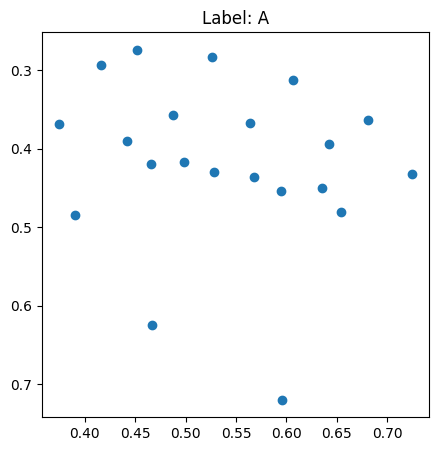

In [ ]:
import matplotlib.pyplot as plt

# Pick a sample
idx = 0  # or any index you'd like
sample = X[idx]
label = y[idx]

# Reshape keypoints to (21, 3) → 21 hand landmarks (x, y, z)
keypoints_reshaped = sample.reshape(21, 3)

# Plot hand keypoints
plt.figure(figsize=(5, 5))
plt.title(f"Label: {label}")
plt.scatter(keypoints_reshaped[:, 0], keypoints_reshaped[:, 1])
plt.gca().invert_yaxis()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Reshape
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = to_categorical(y_encoded)

# Reshape X for LSTM (pretend 1 timestep — for now)
X_lstm = X.reshape(X.shape[0], 1, X.shape[1])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_cat, test_size=0.2, random_state=42)


In [ ]:
import pickle
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)


In [ ]:
with open("label_encoder.pkl", "rb") as f:
    le = pickle.load(f)
labels = le.classes_.tolist()


In [ ]:
model = Sequential()
model.add(LSTM(64, return_sequences=False, activation='relu', input_shape=(1, 63)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(le.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                32768     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 28)                1820      
                                                                 
Total params: 38,748
Trainable params: 38,748
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/15
4142/4142 [==============================] - 17s 3ms/step - loss: 0.9281 - accuracy: 0.7163 - val_loss: 0.2262 - val_accuracy: 0.9379
Epoch 2/15
4142/4142 [==============================] - 14s 3ms/step - loss: 0.3366 - accuracy: 0.8930 - val_loss: 0.1787 - val_accuracy: 0.9464
Epoch 3/15
4142/4142 [==============================] - 14s 3ms/step - loss: 0.2728 - accuracy: 0.9131 - val_loss: 0.1694 - val_accuracy: 0.9467
Epoch 4/15
4142/4142 [==============================] - 15s 4ms/step - loss: 0.2463 - accuracy: 0.9204 - val_loss: 0.1668 - val_accuracy: 0.9466
Epoch 5/15
4142/4142 [==============================] - 15s 4ms/step - loss: 0.2311 - accuracy: 0.9246 - val_loss: 0.1615 - val_accuracy: 0.9478
Epoch 6/15
4142/4142 [==============================] - 14s 3ms/step - loss: 0.2240 - accuracy: 0.9271 - val_loss: 0.1619 - val_accuracy: 0.9474
Epoch 7/15
4142/4142 [==============================] - 15s 4ms/step - loss: 0.2162 - accuracy: 0.9292 - val_loss: 0.1609 - val_ac

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")


1036/1036 [==============================] - 2s 2ms/step - loss: 0.1584 - accuracy: 0.9483
Test Accuracy: 94.83%


In [ ]:
model.save("asl_alphabet_model.h5")


In [ ]:
import cv2
import numpy as np
import mediapipe as mp
from tensorflow.keras.models import load_model

# Load model
model = load_model("asl_alphabet_model.h5")

# Labels (adjust based on your dataset)
labels = list("ABCDEFGHIJKLMNOPQRSTUVWXYZ")

mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1)
mp_draw = mp.solutions.drawing_utils

def extract_keypoints(frame):
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(frame_rgb)
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            keypoints = np.array([[lm.x, lm.y, lm.z] for lm in hand_landmarks.landmark]).flatten()
            return keypoints
    return np.zeros(63)  # 21 landmarks * 3

cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret:
        break

    keypoints = extract_keypoints(frame)
    input_data = np.expand_dims(keypoints, axis=0)  # (1, 63)
    input_data = np.expand_dims(input_data, axis=1)  # (1, 1, 63)
    prediction = model.predict(input_data)
    predicted_label = labels[np.argmax(prediction)]

    cv2.putText(frame, f"Predicted: {predicted_label}", (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow("ASL Alphabet Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
SEQUENCE_LENGTH = 30  # Max frames per video
NUM_KEYPOINTS = 21 * 3  # 21 hand landmarks * (x, y, z)


<IPython.core.display.Javascript object>

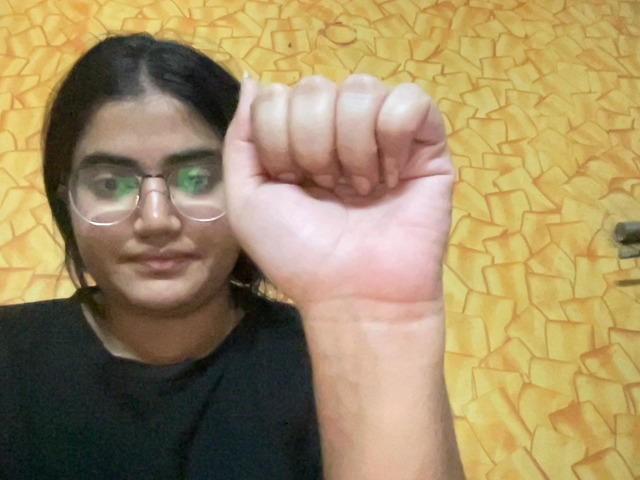

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

def capture_image():
    js = Javascript('''
        async function capture() {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);
            document.body.appendChild(div);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(video);
            video.srcObject = stream;
            await video.play();

            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            video.remove();
            capture.remove();
            const dataUrl = canvas.toDataURL('image/jpeg');
            return dataUrl;
        }
    ''')
    display(js)
    data = eval_js('capture()')
    data = data.split(',')[1]
    img = cv2.imdecode(np.frombuffer(base64.b64decode(data), np.uint8), cv2.IMREAD_COLOR)
    return img

import base64
img = capture_image()
cv2_imshow(img)


In [ ]:
keypoints = extract_keypoints(img)
input_data = np.expand_dims(keypoints, axis=0)
input_data = np.expand_dims(input_data, axis=1)
prediction = model.predict(input_data)
predicted_label = labels[np.argmax(prediction)]
print(f"Predicted Label: {predicted_label}")


1/1 [==============================] - 1s 588ms/step
Predicted Label: A


In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import os

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

def extract_keypoints_from_video(video_path, max_len=SEQUENCE_LENGTH):
    cap = cv2.VideoCapture(video_path)
    sequence = []

    with mp_hands.Hands(static_image_mode=False, max_num_hands=1) as hands:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            results = hands.process(frame)
            if results.multi_hand_landmarks:
                landmarks = results.multi_hand_landmarks[0].landmark
                keypoints = np.array([[lm.x, lm.y, lm.z] for lm in landmarks]).flatten()
            else:
                keypoints = np.zeros(NUM_KEYPOINTS)

            sequence.append(keypoints)

            if len(sequence) >= max_len:
                break

    cap.release()

    # Pad if sequence is too short
    if len(sequence) < max_len:
        padding = [np.zeros(NUM_KEYPOINTS) for _ in range(max_len - len(sequence))]
        sequence.extend(padding)

    return np.array(sequence)


In [ ]:
import json
import pandas as pd

# Load metadata
json_path = os.path.join(wlasl_path, 'WLASL_v0.3.json')
with open(json_path, 'r') as f:
    metadata = json.load(f)

# Extract video-id to label mapping
video_label_pairs = []
for entry in metadata:
    word = entry['gloss']
    for instance in entry['instances']:
        video_id = instance['video_id']
        video_label_pairs.append((video_id, word))

# Convert to DataFrame
df_wlasl = pd.DataFrame(video_label_pairs, columns=['video_id', 'label'])
df_wlasl['video_path'] = df_wlasl['video_id'].apply(lambda x: os.path.join(wlasl_path, 'videos', f'{x}.mp4'))

# Preview
df_wlasl.head()


In [ ]:
import zipfile
import os

# Unzip the uploaded file
with zipfile.ZipFile("/content/assets (1).zip", "r") as zip_ref:
    zip_ref.extractall("ASL_Words")

# List the contents to confirm
os.listdir("ASL_Words")


In [ ]:
video_dir = "ASL_Words/assets"


In [ ]:
import os
import cv2
import numpy as np
import mediapipe as mp
from tqdm import tqdm

video_dir = "ASL_Words/assets"
mp_hands = mp.solutions.hands

def extract_keypoints_from_video(video_path, seq_len=40):
    cap = cv2.VideoCapture(video_path)
    keypoints_seq = []

    with mp_hands.Hands(static_image_mode=False, max_num_hands=1) as hands:
        while len(keypoints_seq) < seq_len:
            ret, frame = cap.read()
            if not ret:
                break
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            results = hands.process(frame_rgb)

            if results.multi_hand_landmarks:
                hand = results.multi_hand_landmarks[0]
                keypoints = np.array([[lm.x, lm.y, lm.z] for lm in hand.landmark]).flatten()
            else:
                keypoints = np.zeros(63)
            keypoints_seq.append(keypoints)

        cap.release()

    # Pad if shorter than seq_len
    if len(keypoints_seq) < seq_len:
        keypoints_seq += [np.zeros(63)] * (seq_len - len(keypoints_seq))

    return np.array(keypoints_seq[:seq_len])


In [ ]:
video_keypoints = []
video_labels = []
label_names = []

for idx, filename in enumerate(tqdm(os.listdir(video_dir), desc="Processing videos")):
    if filename.endswith(".mp4"):
        label = os.path.splitext(filename)[0]
        video_path = os.path.join(video_dir, filename)
        keypoints = extract_keypoints_from_video(video_path)
        if keypoints is not None:
            video_keypoints.append(keypoints)
            video_labels.append(idx)
            label_names.append(label)


In [ ]:
import pickle

X = np.array(video_keypoints)
y = np.array(video_labels)

with open("asl_custom_dataset.pkl", "wb") as f:
    pickle.dump((X, y, label_names), f)

print("✅ Saved:", X.shape, y.shape)


In [ ]:
import os

for root, dirs, files in os.walk("/content"):
    for name in dirs:
        print("📁", os.path.join(root, name))


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import mediapipe as mp

# MediaPipe setup
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Correct folder path
DATA_DIR = "/content/ASL_Words/assets"

# Store keypoints and labels
keypoints_list = []
labels = []

def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21 * 3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21 * 3)
    return np.concatenate([lh, rh])

with mp_holistic.Holistic(static_image_mode=False, min_detection_confidence=0.5, model_complexity=1) as holistic:
    for filename in tqdm(os.listdir(DATA_DIR)):
        if filename.endswith(".mp4") or filename.endswith(".mov"):
            label = os.path.splitext(filename)[0]
            file_path = os.path.join(DATA_DIR, filename)

            cap = cv2.VideoCapture(file_path)
            video_keypoints = []

            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break

                image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                image.flags.writeable = False
                results = holistic.process(image)
                image.flags.writeable = True

                keypoints = extract_keypoints(results)
                video_keypoints.append(keypoints)

            cap.release()

            if len(video_keypoints) >= 10:
                video_keypoints = video_keypoints[:30] if len(video_keypoints) > 30 else video_keypoints + [video_keypoints[-1]] * (30 - len(video_keypoints))
                keypoints_list.append(np.array(video_keypoints))
                labels.append(label)

print(f"✅ Total processed videos: {len(keypoints_list)}")
print(f"✅ Unique labels: {len(set(labels))}")


In [ ]:
from collections import Counter

# Original label counts before filtering
label_counts = Counter(labels)
print("Video count per label:")
for label, count in label_counts.items():
    print(f"{label}: {count}")


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import mediapipe as mp

# Set up MediaPipe
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Your video directory
DATA_DIR = "/content/ASL_Words/assets"

# Function to extract keypoints from one frame
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*3)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

# Extract keypoints for each video
video_keypoints = {}
labels = []

with mp_holistic.Holistic(static_image_mode=False, min_detection_confidence=0.5) as holistic:
    for filename in tqdm(sorted(os.listdir(DATA_DIR))):
        if filename.endswith(".mp4") or filename.endswith(".mov"):
            label = os.path.splitext(filename)[0]
            cap = cv2.VideoCapture(os.path.join(DATA_DIR, filename))
            keypoints_seq = []

            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break
                image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                results = holistic.process(image)
                keypoints = extract_keypoints(results)
                keypoints_seq.append(keypoints)

            cap.release()

            if len(keypoints_seq) > 0:
                avg_keypoints = np.mean(keypoints_seq, axis=0)
                video_keypoints[label] = avg_keypoints
                labels.append(label)

print(f"\n✅ Total processed videos: {len(video_keypoints)}")


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def predict_word(video_path):
    cap = cv2.VideoCapture(video_path)
    keypoints_seq = []

    with mp_holistic.Holistic(static_image_mode=False, min_detection_confidence=0.5) as holistic:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            results = holistic.process(image)
            keypoints = extract_keypoints(results)
            keypoints_seq.append(keypoints)

    cap.release()

    if len(keypoints_seq) == 0:
        print("❌ No valid frames in the test video.")
        return None

    avg_test_keypoints = np.mean(keypoints_seq, axis=0)

    # Compare with each stored video's keypoints
    best_match = None
    best_score = -1

    for label, train_kp in video_keypoints.items():
        score = cosine_similarity([avg_test_keypoints], [train_kp])[0][0]
        if score > best_score:
            best_score = score
            best_match = label

    print(f"\n✅ Predicted word: {best_match} (Similarity: {best_score:.2f})")
    return best_match


In [ ]:
import os

video_folder = "/content/ASL_Words/assets"
for file in os.listdir(video_folder):
    print(file)


In [ ]:
!ffmpeg -i "/content/ASL_Words/assets/Hello.mp4" -vcodec libx264 -crf 23 "/content/hello_converted.mp4"


In [ ]:
import cv2
import numpy as np
import mediapipe as mp

# Initialize MediaPipe Holistic
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Function to extract keypoints
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)
    return np.concatenate([pose, face, lh, rh])

# Load and process the video
video_path = '/content/hello_converted.mp4'
cap = cv2.VideoCapture(video_path)

keypoints_all_frames = []
with mp_holistic.Holistic(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        # Convert color space
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make detections
        results = holistic.process(image)
        image.flags.writeable = True

        # Extract keypoints
        keypoints = extract_keypoints(results)
        keypoints_all_frames.append(keypoints)

cap.release()

# Convert to numpy array
keypoints_all_frames = np.array(keypoints_all_frames)
print(f"Extracted {len(keypoints_all_frames)} frames of keypoints. Shape: {keypoints_all_frames.shape}")


In [ ]:
from tensorflow.keras.utils import to_categorical

MAX_FRAMES = 30

# Pad or truncate to fixed length
def pad_or_truncate(sequence, max_len=MAX_FRAMES):
    if len(sequence) > max_len:
        return sequence[:max_len]
    elif len(sequence) < max_len:
        padding = np.zeros((max_len - len(sequence), sequence.shape[1]))
        return np.vstack((sequence, padding))
    else:
        return sequence

# Apply padding/truncation
processed_sequence = pad_or_truncate(keypoints_all_frames)

# Reshape and create label
X = processed_sequence  # shape (30, 1662)
y = to_categorical([0], num_classes=1)  # Label: 'Hello' is class 0 for now

print(f"Final input shape for model: {X.shape}, label: {y}")


In [ ]:
import cv2
import os
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import mediapipe as mp

DATA_DIR = "/content/ASL_Words/assets"
MAX_FRAMES = 30
keypoints_list = []
labels_list = []

mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Extract keypoints from a single frame
def extract_keypoints(results):
    def flatten_landmarks(landmarks, total_points):
        if landmarks:
            return np.array([[lm.x, lm.y, lm.z] for lm in landmarks]).flatten()
        else:
            return np.zeros(total_points * 3)

    pose = flatten_landmarks(results.pose_landmarks.landmark if results.pose_landmarks else None, 33)
    left_hand = flatten_landmarks(results.left_hand_landmarks.landmark if results.left_hand_landmarks else None, 21)
    right_hand = flatten_landmarks(results.right_hand_landmarks.landmark if results.right_hand_landmarks else None, 21)
    face = flatten_landmarks(results.face_landmarks.landmark if results.face_landmarks else None, 468)

    return np.concatenate([pose, left_hand, right_hand, face])

# Pad/truncate to MAX_FRAMES
def pad_or_truncate(sequence, max_len=MAX_FRAMES):
    if len(sequence) > max_len:
        return sequence[:max_len]
    elif len(sequence) < max_len:
        padding = np.zeros((max_len - len(sequence), sequence.shape[1]))
        return np.vstack((sequence, padding))
    return sequence

# Process all videos
with mp_holistic.Holistic(static_image_mode=False, min_detection_confidence=0.5, model_complexity=1) as holistic:
    for filename in tqdm(sorted(os.listdir(DATA_DIR))):
        if filename.endswith(".mp4") or filename.endswith(".mov"):
            label = os.path.splitext(filename)[0]
            filepath = os.path.join(DATA_DIR, filename)
            cap = cv2.VideoCapture(filepath)

            keypoints_per_frame = []
            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break

                image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                results = holistic.process(image)
                keypoints = extract_keypoints(results)
                keypoints_per_frame.append(keypoints)

            cap.release()

            if keypoints_per_frame:
                keypoints_seq = np.array(keypoints_per_frame)
                padded_seq = pad_or_truncate(keypoints_seq)
                keypoints_list.append(padded_seq)
                labels_list.append(label)

# Convert to arrays
X = np.array(keypoints_list)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels_list)
y = to_categorical(y_encoded)

print(f"✅ Final shape of X: {X.shape}, y: {y.shape}")
print(f"Classes: {label_encoder.classes_}")


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking

# Number of unique words (classes)
num_classes = 132

model = Sequential([
    Masking(mask_value=0.0, input_shape=(30, 1662)),
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


In [ ]:
# Save model architecture to JSON
model_json = model.to_json()
with open("asl_lstm_model.json", "w") as json_file:
    json_file.write(model_json)

# Save full model (architecture + weights)
model.save("asl_lstm_model.h5")

print("Model architecture and full model saved successfully.")


In [ ]:
import pickle

# Assuming you already used LabelEncoder earlier as:
# label_encoder = LabelEncoder()
# label_encoder.fit(y_labels)

# Save the fitted LabelEncoder
with open("label_encoder.pkl", "wb") as file:
    pickle.dump(label_encoder, file)

print("LabelEncoder saved successfully.")

In [ ]:
with open("label_encoder.pkl", "rb") as file:
    label_encoder = pickle.load(file)

In [ ]:
import cv2
import numpy as np
import mediapipe as mp
from tensorflow.keras.models import load_model
import pickle

# Load model and label encoder
model = load_model("asl_lstm_model.h5")
with open("label_encoder.pkl", "rb") as file:
    label_encoder = pickle.load(file)

# Mediapipe setup
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

# Constants
SEQUENCE_LENGTH = 31  # Number of frames per input sequence
NUM_KEYPOINTS = 1662  # 21 keypoints * 2 hands * 3 values (x, y, z)

# Helper to extract keypoints from a frame
def extract_keypoints_from_frame(image):
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    keypoints = []

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            for lm in hand_landmarks.landmark:
                keypoints.extend([lm.x, lm.y, lm.z])
        # If only 1 hand, duplicate to simulate 2-hand input
        if len(results.multi_hand_landmarks) == 1:
            keypoints *= 2
    else:
        # No hands detected, pad with zeros
        keypoints = [0.0] * NUM_KEYPOINTS

    return np.array(keypoints)

# Frame buffer for sequence
sequence = []

# Start webcam
cap = cv2.VideoCapture(0)
print("Starting webcam... Press 'q' to quit.")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        continue

    frame = cv2.flip(frame, 1)
    keypoints = extract_keypoints_from_frame(frame)
    sequence.append(keypoints)

    # Maintain sequence length
    if len(sequence) > SEQUENCE_LENGTH:
        sequence.pop(0)

    # Predict once we have enough frames
    if len(sequence) == SEQUENCE_LENGTH:
        input_seq = np.expand_dims(sequence, axis=0)  # Shape: (1, 31, 1662)
        prediction = model.predict(input_seq, verbose=0)[0]
        predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])[0]
        confidence = np.max(prediction)

        # Display prediction
        cv2.putText(frame, f"{predicted_label} ({confidence:.2f})", (10, 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 3)

    # Show webcam
    cv2.imshow("ASL Real-Time Prediction", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Cleanup
cap.release()
cv2.destroyAllWindows()
hands.close()


In [ ]:
!ls asl_lstm_model.h5 label_encoder.pkl


In [ ]:
code = """
import cv2
import numpy as np
import mediapipe as mp
import tensorflow as tf
import pickle
from tensorflow.keras.models import load_model
from collections import deque

# Load models
word_model = load_model('asl_lstm_model.h5')
alphabet_model = load_model('asl_alphabet_model.h5')

# Load label encoder
with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

# MediaPipe hands
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(max_num_hands=1, min_detection_confidence=0.7)

# Buffer to hold keypoints for LSTM
sequence = deque(maxlen=30)

def extract_keypoints(results):
    if results.multi_hand_landmarks:
        hand = results.multi_hand_landmarks[0]
        return np.array([[lm.x, lm.y, lm.z] for lm in hand.landmark]).flatten()
    else:
        return np.zeros(21 * 3)

# Webcam
cap = cv2.VideoCapture(0)
print("Webcam started. Press 'q' to quit.")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Flip and convert
    image = cv2.flip(frame, 1)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image_rgb)

    # Draw hand landmarks
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    # Extract keypoints
    keypoints = extract_keypoints(results)
    sequence.append(keypoints)

    # Prediction
    if len(sequence) == 1:
        input_data = np.expand_dims(sequence[0], axis=0)
        prediction = alphabet_model.predict(input_data)[0]
        pred_class = np.argmax(prediction)
        confidence = prediction[pred_class]
        label = chr(65 + pred_class) if confidence > 0.9 else ""
    elif len(sequence) == 30:
        input_data = np.expand_dims(sequence, axis=0)
        prediction = word_model.predict(input_data)[0]
        pred_class = np.argmax(prediction)
        confidence = prediction[pred_class]
        label = label_encoder.inverse_transform([pred_class])[0] if confidence > 0.7 else ""
    else:
        label = ""

    # Display label
    cv2.putText(image, f'{label}', (30, 80), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)

    # Show image
    cv2.imshow('ASL Real-time', image)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
"""

with open("predict_realtime.py", "w") as f:
    f.write(code)

print("✅ `predict_realtime.py` has been created!")
